In [41]:
import pandas as pd
from collections import Counter
from ast import literal_eval
from tqdm import tqdm

import matplotlib.pyplot as plt

In [20]:
columns_names = ['date', 'language', 'mentions', 'n_retweets', 'user_id', 'tweet', 'type', 'retweeted_to_id', 'quoted_i']
cols = [2, 3, 4, 7, 8, 10, 12, 13, 14]
data = pd.read_csv('data/jan18_data.csv', usecols=cols, names=columns_names)

In [10]:
data.head()

,date,language,mentions,n_retweets,user_id,tweet,type,retweeted_to_id,quoted_i
0,2021-12-09 10:56:06,it,{'urls': [{'start': 26; 'end': 49; 'url': 'htt...,{'retweet_count': 0; 'reply_count': 0; 'like_c...,855904725652451330,Croce Rossa della Italia: https://t.co/lbnBTjx...,\N,\N,\N
1,2021-12-09 10:56:06,it,{'mentions': [{'start': 0; 'end': 13; 'usernam...,{'retweet_count': 0; 'reply_count': 0; 'like_c...,2346647000,@annibale1962 @IULIUSAGRICOLA @distefanoTW @br...,[{'type': 'replied_to'; 'id': '952658933956653...,3261739077,\N
2,2021-12-09 10:56:06,it,{'mentions': [{'start': 45; 'end': 57; 'userna...,{'retweet_count': 1; 'reply_count': 0; 'like_c...,327445938,Come ci si può fidare di testate del genere?\\...,[{'type': 'quoted'; 'id': '952649047000657920'}],\N,[{'domain': {'id': '47'; 'name': 'Brand'; 'des...
3,2021-12-09 10:56:06,it,{'mentions': [{'start': 0; 'end': 11; 'usernam...,{'retweet_count': 0; 'reply_count': 1; 'like_c...,1009687062,@petroglifi @borghi_claudio @marcogirgi @Roghi...,[{'type': 'replied_to'; 'id': '952653212166782...,2346647000,\N
4,2021-12-09 10:56:06,it,{'mentions': [{'start': 98; 'end': 109; 'usern...,{'retweet_count': 2; 'reply_count': 0; 'like_c...,98654009,Sassate contro l'auto della Croce rossa; forse...,\N,\N,\N


In [55]:
nb_rows = data.shape[0]

In [21]:
def custom_eval(character):
    return literal_eval(character.replace(';', ','))

In [25]:
retweet_counts = []
like_counts = []
reply_counts = []
quote_counts = []

retweets = list(data.n_retweets)
for retweet in tqdm(retweets):
    dict_retweet = custom_eval(retweet)
    retweet_counts.append(dict_retweet['retweet_count'])
    reply_counts.append(dict_retweet['reply_count'])
    like_counts.append(dict_retweet['like_count'])
    quote_counts.append(dict_retweet['quote_count'])

100%|██████████| 1702507/1702507 [01:36<00:00, 17691.77it/s]


Text(0, 0.5, 'number of occurences')

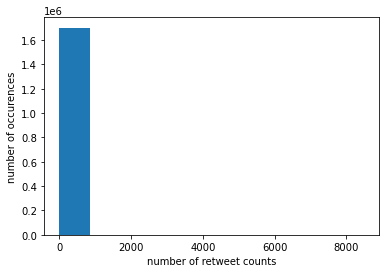

In [37]:
plt.hist(retweet_counts)
plt.xlabel('number of retweet counts')
plt.ylabel('number of occurences')

(array([1.702318e+06, 6.300000e+01, 0.000000e+00, 6.300000e+01,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 6.300000e+01]),
 array([   0. ,  173.9,  347.8,  521.7,  695.6,  869.5, 1043.4, 1217.3,
        1391.2, 1565.1, 1739. ]),
 <BarContainer object of 10 artists>)

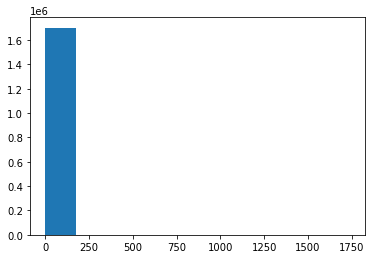

In [34]:
plt.hist(reply_counts)
plt.xlabel('number of reply counts')
plt.ylabel('number of occurences')

Text(0, 0.5, 'number of occurences')

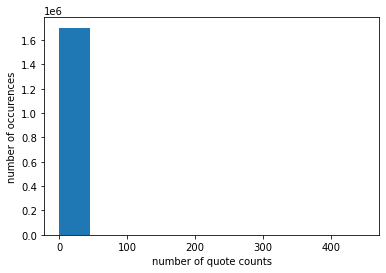

In [38]:
plt.hist(quote_counts)
plt.xlabel('number of quote counts')
plt.ylabel('number of occurences')

Text(0, 0.5, 'number of occurences')

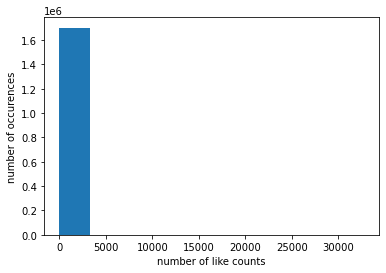

In [36]:
plt.hist(like_counts)
plt.xlabel('number of like counts')
plt.ylabel('number of occurences')

In [47]:
language_counts = Counter(data.language)
most_used_languages = [item[0] for item in language_counts.most_common(5)]
most_used_languages

['en', 'ar', 'es', 'und', 'fr']

Text(0, 0.5, '# of occurences')

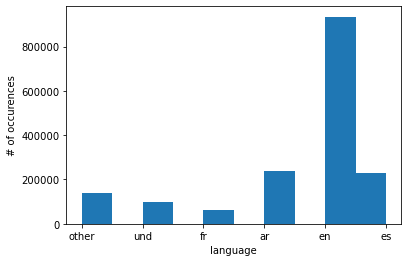

In [59]:
processed_list = [item if item in most_used_languages else 'other' for item in languages]
plt.hist(processed_list)
plt.xlabel('language')
plt.ylabel('# of occurences')